# #0 Table of Content
1. Import packages and data
2. Clean data
3. Understanding user rating  
   3.1. Visualize original rating  
   3.2. Visualize normalized rating  
4. Export data

# #1 Import packages, data and creating functions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
merchant_table = pd.read_csv("../asset/etlMerchant.csv")
product_table  = pd.read_csv("../asset/etlProduct.csv")
user_table     = pd.read_csv("../asset/etlUser.csv")
review_table   = pd.read_csv("../asset/etlReview.csv")

# #2 Clean data

In [3]:
user_table = user_table[user_table['username'] != 'Shopee User']

In [4]:
anon_user  = user_table[ user_table['username'].str.contains('\*')]
print(f"{len(anon_user)} anonymous users")
display(anon_user.head(3))

xanon_user = user_table[~user_table['username'].str.contains('\*')]
print(f"{len(xanon_user)} non anonymous users")
display(xanon_user.head(3))

1278 anonymous users


,username,no_review,no_product,mean_rating,review_list,product_dict
0,.*****.,10,5,4.9,"['03afe402-5369-42bf-9b01-1427b239d0ee', 'afa6...","{'d19cf120-93e6-4f1c-89c2-2b18187139cb': 2, '5..."
1,.*****9,1,1,5.0,['a0687dbd-7bf2-47a9-b3c3-d65be8c07cda'],{'188cb6f8-9a76-4c58-aab3-1dbc11cb2b2e': 1}
2,.*****_,2,2,5.0,"['7a2df4e5-6822-4e7a-836b-4b315382a643', 'aaef...","{'cbd4fe9d-1474-4653-9e63-9d8bd9233413': 1, '8..."


78988 non anonymous users


,username,no_review,no_product,mean_rating,review_list,product_dict
8,.....9757,1,1,5.0,['62966237-6944-4c1c-8959-112cc39b3c8d'],{'9bfe3373-1fef-4500-88ab-3a6a50137c25': 1}
9,.....linh123,1,1,5.0,['38139145-b628-4e4c-a740-00ed005bb9b4'],{'b14fb80e-204a-4007-8a22-8d467f9cbc36': 1}
10,..shadsa,1,1,5.0,['c62c1918-23ea-4e7d-94a3-e37d958be653'],{'d6302a40-27a8-4f1f-ab29-7cfbb33563d5': 1}


# #3 Understanding user rating

## #3.1 Visualize the original rating

(1278, 6)


,username,no_review,no_product,mean_rating,review_list,product_dict
0,.*****.,10,5,4.9,"['03afe402-5369-42bf-9b01-1427b239d0ee', 'afa6...","{'d19cf120-93e6-4f1c-89c2-2b18187139cb': 2, '5..."
1,.*****9,1,1,5.0,['a0687dbd-7bf2-47a9-b3c3-d65be8c07cda'],{'188cb6f8-9a76-4c58-aab3-1dbc11cb2b2e': 1}
2,.*****_,2,2,5.0,"['7a2df4e5-6822-4e7a-836b-4b315382a643', 'aaef...","{'cbd4fe9d-1474-4653-9e63-9d8bd9233413': 1, '8..."


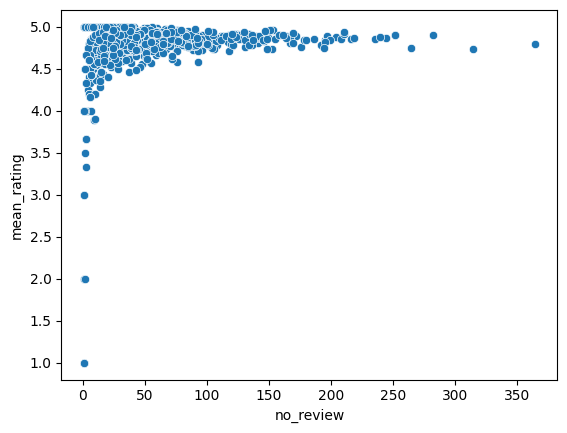

In [5]:
print(anon_user.shape)
display(anon_user.head(3))

sns.scatterplot(data=anon_user, x='no_review', y='mean_rating')
plt.show()

(78988, 6)


,username,no_review,no_product,mean_rating,review_list,product_dict
8,.....9757,1,1,5.0,['62966237-6944-4c1c-8959-112cc39b3c8d'],{'9bfe3373-1fef-4500-88ab-3a6a50137c25': 1}
9,.....linh123,1,1,5.0,['38139145-b628-4e4c-a740-00ed005bb9b4'],{'b14fb80e-204a-4007-8a22-8d467f9cbc36': 1}
10,..shadsa,1,1,5.0,['c62c1918-23ea-4e7d-94a3-e37d958be653'],{'d6302a40-27a8-4f1f-ab29-7cfbb33563d5': 1}


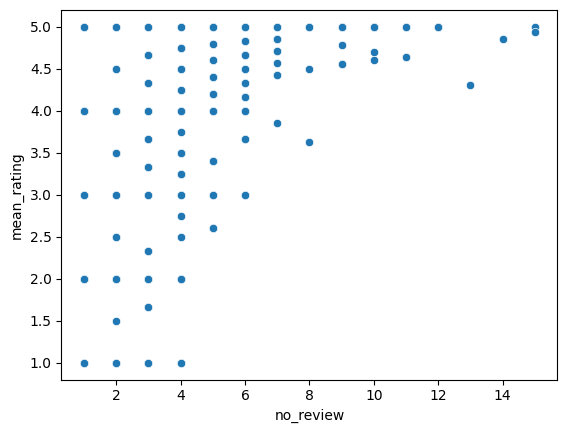

In [6]:
print(xanon_user.shape)
display(xanon_user.head(3))

sns.scatterplot(data=xanon_user, x='no_review', y='mean_rating')
plt.show()

18736 people with 2 or more reviews


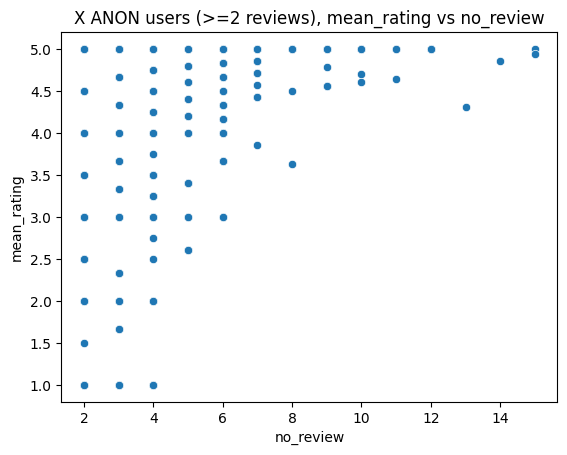

5689 people with 3 or more reviews


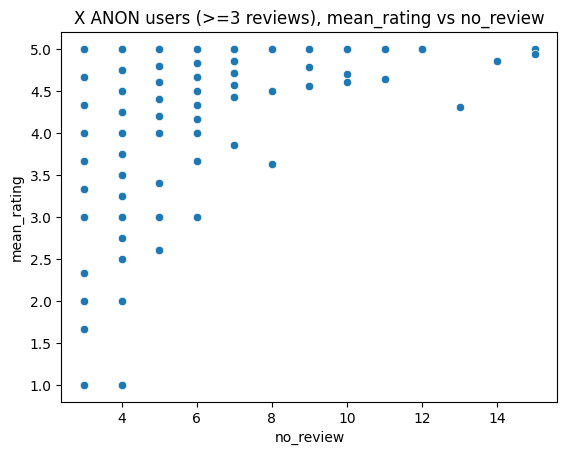

2751 people with 4 or more reviews


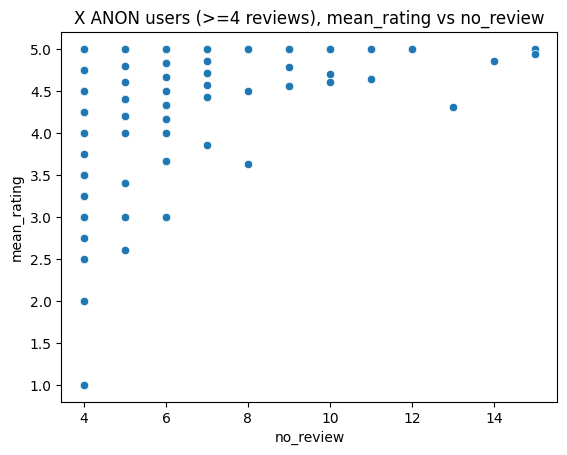

In [7]:
table = xanon_user[xanon_user['no_review'] >= 2]
print(f"{len(table)} people with 2 or more reviews")
sns.scatterplot(data=table, x='no_review', y='mean_rating')
plt.title("X ANON users (>=2 reviews), mean_rating vs no_review")
plt.show()

table = xanon_user[xanon_user['no_review'] >= 3]
print(f"{len(table)} people with 3 or more reviews")
sns.scatterplot(data=table, x='no_review', y='mean_rating')
plt.title("X ANON users (>=3 reviews), mean_rating vs no_review")
plt.show()

table = xanon_user[xanon_user['no_review'] >= 4]
print(f"{len(table)} people with 4 or more reviews")
sns.scatterplot(data=table, x='no_review', y='mean_rating')
plt.title("X ANON users (>=4 reviews), mean_rating vs no_review")
plt.show()

In [8]:
print(f"{len(review_table)} reviews available")
print(review_table['product_id'].nunique())

table = xanon_user[xanon_user['no_review'] >= 1].merge(review_table, on='username', how='left')
print(f"{len(table)} reviews available for users with >=1 reviews")
print(f"{table['product_id'].nunique()} unique products for users with >= 1 reviews")

table = xanon_user[xanon_user['no_review'] >= 2].merge(review_table, on='username', how='left')
print(f"{len(table)} reviews available for users with >=2 reviews")
print(f"{table['product_id'].nunique()} unique products for users with >= 2 reviews")

table = xanon_user[xanon_user['no_review'] >= 3].merge(review_table, on='username', how='left')
print(f"{len(table)} reviews available for users with >=3 reviews")
print(f"{table['product_id'].nunique()} unique products for users with >= 3 reviews")

table = xanon_user[xanon_user['no_review'] >= 4].merge(review_table, on='username', how='left')
print(f"{len(table)} reviews available for users with >=4 reviews")
print(f"{table['product_id'].nunique()} unique products for users with >= 4 reviews")

155253 reviews available
567
107803 reviews available for users with >=1 reviews
558 unique products for users with >= 1 reviews
47551 reviews available for users with >=2 reviews
507 unique products for users with >= 2 reviews
21457 reviews available for users with >=3 reviews
438 unique products for users with >= 3 reviews
12643 reviews available for users with >=4 reviews
372 unique products for users with >= 4 reviews


## #3.2 Visualize the normalized rating

In [9]:
table = xanon_user[xanon_user['no_review'] >= 2]

mean_rating_df = table[['username','mean_rating']]
newReview_table = review_table.merge(mean_rating_df, on='username', how='right')
newReview_table['normalized_rating'] = newReview_table['rating'] - newReview_table['mean_rating']
display(newReview_table.head(3))

,review_id,username,product_id,date,rating,content,location,mean_rating,normalized_rating
0,96a3b0b6-52a6-4c40-b89d-a93e7d43e090,.lili.put,2ce67b58-50e3-421f-a6db-905ba5a6fedb,2022-03-31 11:25:00,5,NaN,NaN,5.0,0.0
1,ff7d10aa-000f-41c4-8809-b431cbcfd5c6,.lili.put,ca9ca9d8-8590-4b06-9625-a20aad02f436,2022-06-08 11:03:00,5,NaN,NaN,5.0,0.0
2,5adb47d8-2f4c-4014-894d-8a916f4eb940,.monzahra14,f3fa9875-2028-4413-8c81-726d6216404a,2023-02-11 16:18:00,5,nice,NaN,5.0,0.0


,product_id,avg_norm_rating,count_norm_rating,avg_rating,total_rating
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,-0.18,10,4.3,53
1,013ebc59-8967-493f-a620-c840559f366a,0.02,256,4.9,1200
2,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,0.09,47,4.9,188


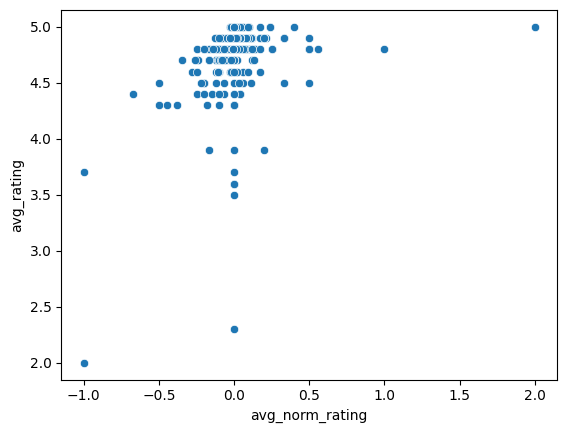

In [10]:
aggregate = {
    "normalized_rating": ['mean','count']
}

normalize_rating_df = newReview_table.groupby('product_id').agg(aggregate).reset_index()
normalize_rating_df.columns = ['product_id', 'avg_norm_rating', 'count_norm_rating']
normalize_rating_df['avg_norm_rating'] = normalize_rating_df['avg_norm_rating'].round(2)
normalize_rating_df = normalize_rating_df.merge(product_table[['product_id','avg_rating','total_rating']], on='product_id', how='left')

display(normalize_rating_df.head(3))
sns.scatterplot(data=normalize_rating_df, x='avg_norm_rating', y='avg_rating')
plt.show()

# #4 Export data

In [11]:
output_table = normalize_rating_df[['product_id','avg_norm_rating','count_norm_rating']]
output_table = output_table.merge(product_table[['product_id']], on='product_id', how='right')
output_table['avg_norm_rating'] = output_table['avg_norm_rating'].fillna(0)
output_table['count_norm_rating'] = output_table['count_norm_rating'].fillna(0).astype(int)
output_table

,product_id,avg_norm_rating,count_norm_rating
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,0.00,197
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,0.02,40
2,35ff0f3c-8a06-4e33-a789-319ff793220d,-0.07,14
3,33cfcddf-a606-4d60-8d78-5926aee333ac,-0.12,14
4,58b2475a-2ba2-4404-b9b5-35a633c76462,0.02,352
...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,0.00,9
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,0.00,0
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,0.00,0
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,-0.03,8


In [12]:
output_table.to_csv("../asset/addProduct.csv", index=False)